In [69]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv('C:\\Users\\User\\Desktop\\Most_followed_users_on_Twitter.csv')
df

,Screen name,Followers count,Friends count,Statuses count,Listed count,Is protected,Is verified,Last tweet,Tweets per day,PI score,PI activity,PI audience,PI authority,Last tweet.year,Last tweet.month,Last tweet.day-of-month,Last tweet.day-of-week,Last tweet.hour,Last tweet.minute,Last tweet.second
0,justinbieber,41952145,122325,22834,554252,False,True,2013-07-17T01:19:34,14.527990,90,68,95,90,2013.0,7.0,17.0,3.0,1.0,19.0,34.0
1,katyperry,39426319,121,4674,133692,False,True,2013-07-15T13:38:44,2.907750,92,35,90,92,2013.0,7.0,15.0,1.0,13.0,38.0,44.0
2,ladygaga,39175845,135495,2638,243671,False,True,2013-06-26T16:54:04,1.360864,92,29,89,91,2013.0,6.0,26.0,3.0,16.0,54.0,4.0
3,BarackObama,34228768,660542,9471,196050,False,True,2013-07-16T23:34:43,4.072683,92,40,91,97,2013.0,7.0,16.0,2.0,23.0,34.0,43.0
4,taylorswift13,30895450,106,1824,111687,False,True,2013-07-16T15:21:01,1.083140,92,23,92,91,2013.0,7.0,16.0,2.0,15.0,21.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,jooo_ri,251533,214799,43541,120,False,False,2013-06-20T17:16:04,160.905136,11,12,17,9,2013.0,6.0,20.0,4.0,17.0,16.0,4.0
9996,VicesAdulation,251528,2381,1609,19,False,False,2013-07-12T23:12:15,10.026991,68,40,84,4,2013.0,7.0,12.0,5.0,23.0,12.0,15.0
9997,Elaine_DeJesus,251496,1019,28980,828,False,True,2013-07-16T21:28:01,20.008083,75,69,76,69,2013.0,7.0,16.0,2.0,21.0,28.0,1.0
9998,rk,251482,506,8566,771,False,False,2013-07-16T16:52:46,3.529320,76,59,80,42,2013.0,7.0,16.0,2.0,16.0,52.0,46.0


In [21]:
df.columns

Index(['Screen name', 'Followers count', 'Friends count', 'Statuses count',
       'Listed count', 'Is protected', 'Is verified', 'Last tweet',
       'Tweets per day', 'PI score', 'PI activity', 'PI audience',
       'PI authority', 'Last tweet.year', 'Last tweet.month',
       'Last tweet.day-of-month', 'Last tweet.day-of-week', 'Last tweet.hour',
       'Last tweet.minute', 'Last tweet.second'],
      dtype='object')

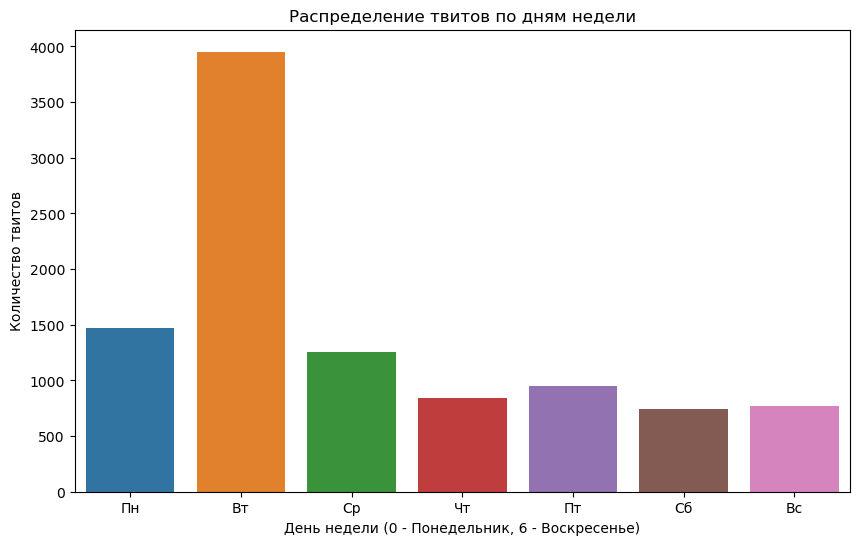

C:\Users\User\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\User\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


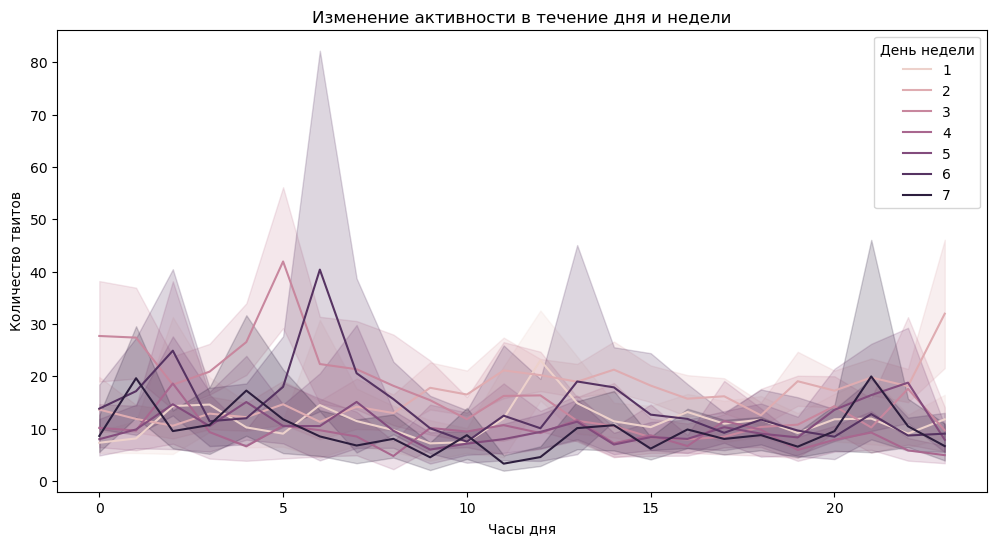

In [75]:
# Построение гистограммы количества твитов по дням недели
plt.figure(figsize=(10, 6))
sns.countplot(x='Last tweet.day-of-week', data=df)
plt.title('Распределение твитов по дням недели')
plt.xlabel('День недели (0 - Понедельник, 6 - Воскресенье)')
plt.ylabel('Количество твитов')
plt.xticks(range(7), ['Пн', 'Вт', 'Ср', 'Чт', 'Пт', 'Сб', 'Вс'])
plt.show()

plt.figure(figsize=(12, 6))
sns.lineplot(x='Last tweet.hour', y='Tweets per day', hue='Last tweet.day-of-week', data=df)
plt.title('Изменение активности в течение дня и недели')
plt.xlabel('Часы дня')
plt.ylabel('Количество твитов')
plt.legend(title='День недели')
plt.show()


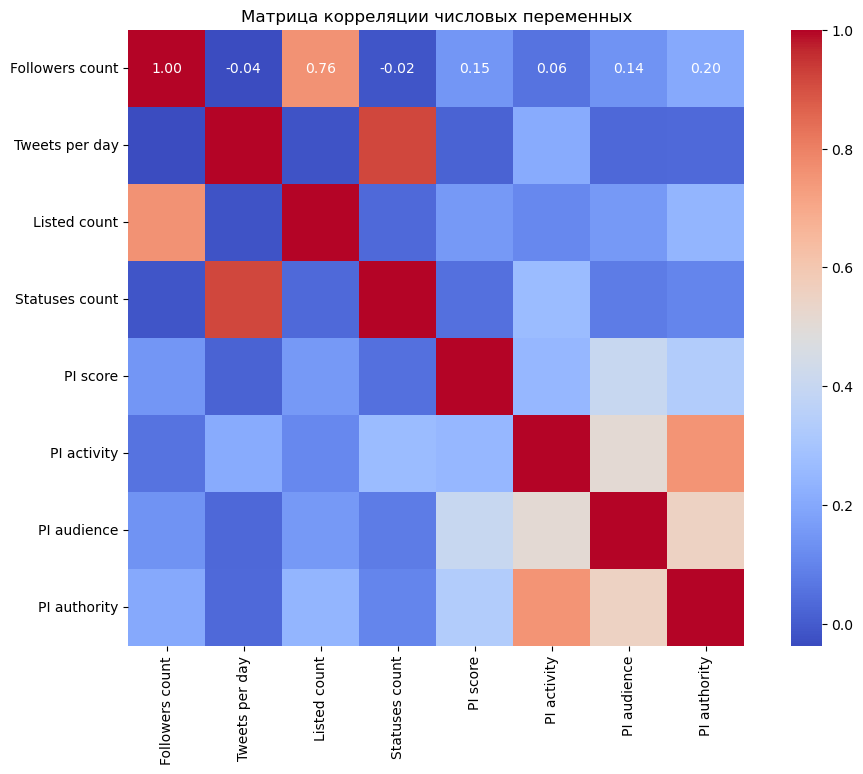

In [66]:
# Построение матрицы корреляции
correlation_matrix = df[['Followers count', 'Tweets per day', 'Listed count', 'Statuses count', 
                         'PI score', 'PI activity', 'PI audience', 'PI authority']].corr()

plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', square=True)
plt.title('Матрица корреляции числовых переменных')
plt.show()


'Listed count' больше всего влияет на 'Followers count' 

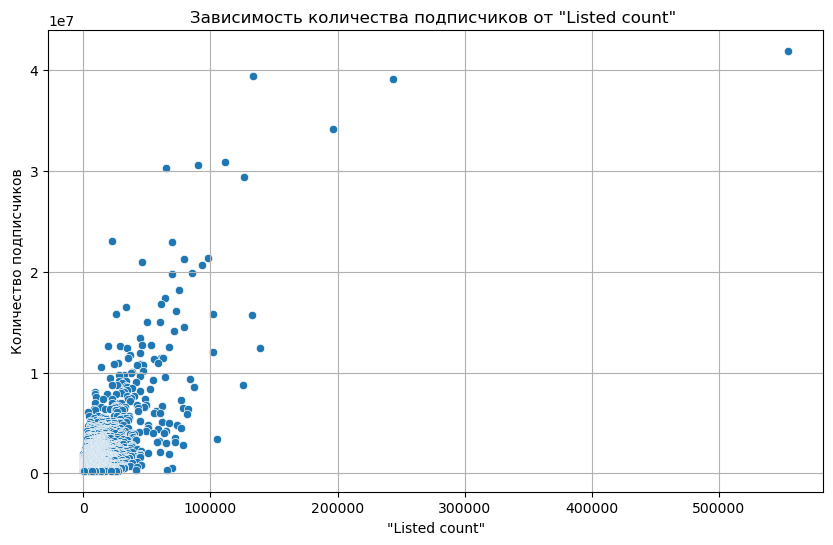

Коэффициент корреляции : 0.76


In [68]:
required_columns = ['Listed count', 'Followers count']
if not all(col in df.columns for col in required_columns):
    raise ValueError("Отсутствуют необходимые столбцы в данных")
    
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Listed count', y='Followers count', data=df)
plt.title('Зависимость количества подписчиков от "Listed count" ')
plt.xlabel('"Listed count"')
plt.ylabel('Количество подписчиков')
plt.grid(True)
plt.show()

list_count = df['Listed count']
followers_count = df['Followers count']

corr_matrix = np.corrcoef(list_count, followers_count)
correlation_coef = corr_matrix[0, 1]
print(f"Коэффициент корреляции : {correlation_coef:.2f}")

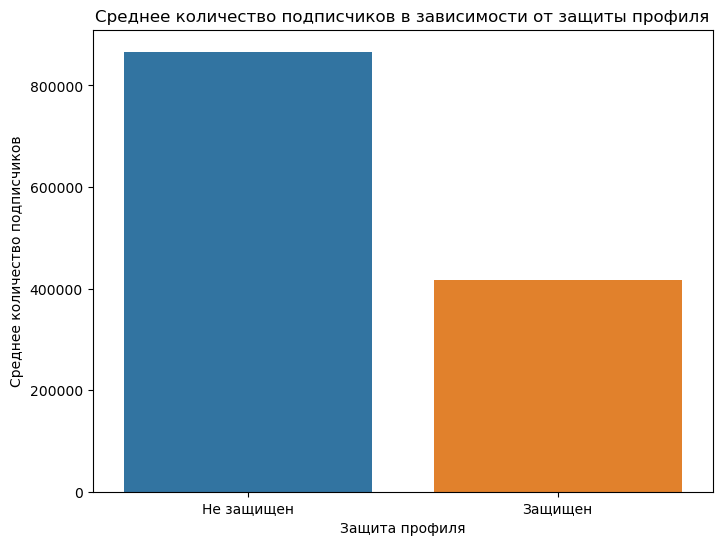

In [54]:
# Сводная таблица для анализа влияния Is protected на количество подписчиков
protected_counts = df.groupby('Is protected')['Followers count'].mean()
plt.figure(figsize=(8, 6))
sns.barplot(x=protected_counts.index, y=protected_counts.values)
plt.title('Среднее количество подписчиков в зависимости от защиты профиля')
plt.xlabel('Защита профиля')
plt.ylabel('Среднее количество подписчиков')
plt.xticks([0, 1], ['Не защищен', 'Защищен'])
plt.show()

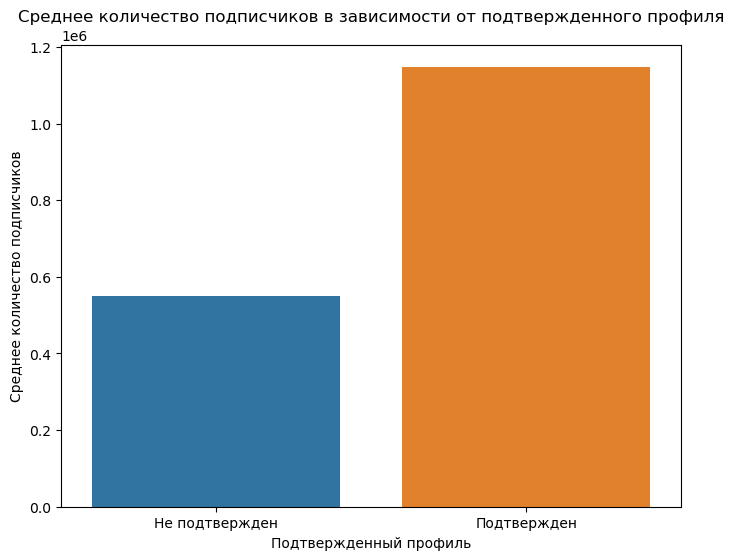

In [55]:
# Сводная таблица для анализа влияния Is verified на количество подписчиков
verified_counts = df.groupby('Is verified')['Followers count'].mean()
plt.figure(figsize=(8, 6))
sns.barplot(x=verified_counts.index, y=verified_counts.values)
plt.title('Среднее количество подписчиков в зависимости от подтвержденного профиля')
plt.xlabel('Подтвержденный профиль')
plt.ylabel('Среднее количество подписчиков')
plt.xticks([0, 1], ['Не подтвержден', 'Подтвержден'])
plt.show()

C:\Users\User\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\User\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


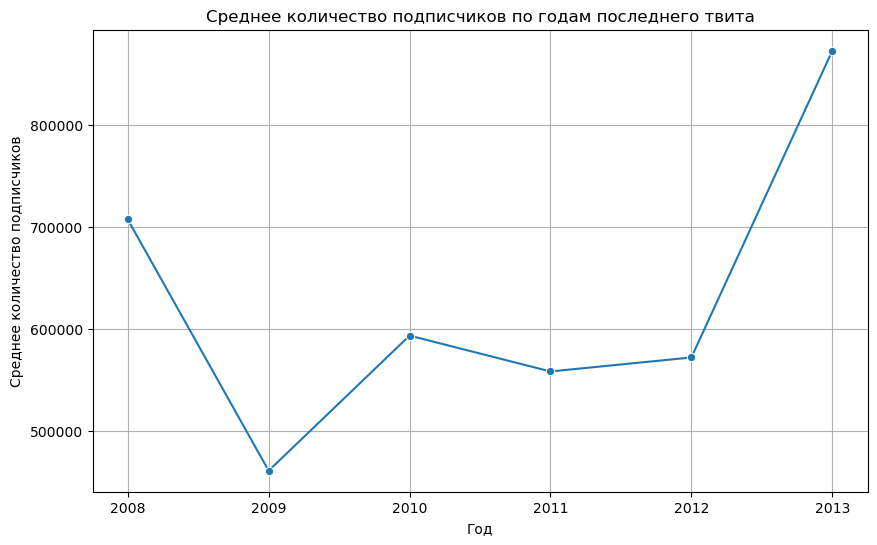

In [58]:
# Группировка по году последнего твита и вычисление среднего количества подписчиков
followers_by_year = df.groupby('Last tweet.year')['Followers count'].mean()
plt.figure(figsize=(10, 6))
sns.lineplot(x=followers_by_year.index, y=followers_by_year.values, marker='o')
plt.title('Среднее количество подписчиков по годам последнего твита')
plt.xlabel('Год')
plt.ylabel('Среднее количество подписчиков')
plt.grid(True)
plt.show()

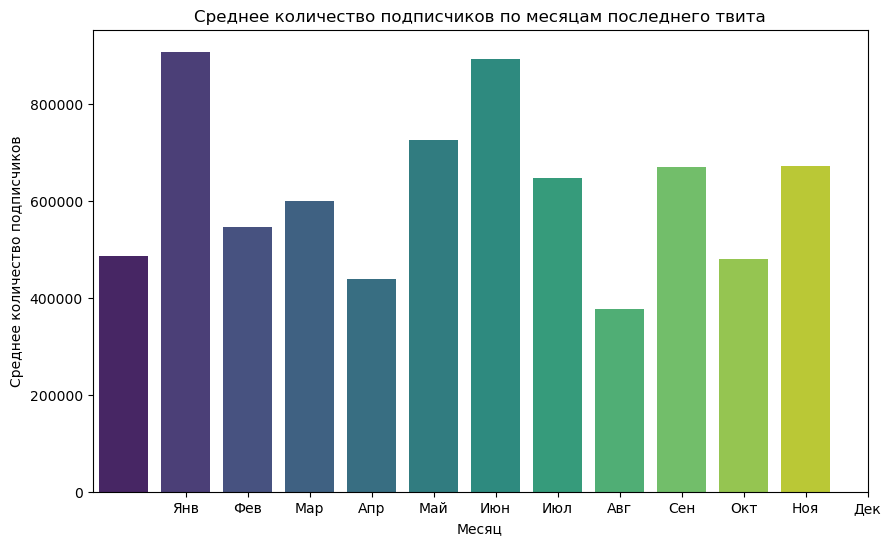

In [59]:
# Группировка по месяцу последнего твита и вычисление среднего количества подписчиков
followers_by_month = df.groupby('Last tweet.month')['Followers count'].mean()

plt.figure(figsize=(10, 6))
sns.barplot(x=followers_by_month.index, y=followers_by_month.values, palette='viridis')
plt.title('Среднее количество подписчиков по месяцам последнего твита')
plt.xlabel('Месяц')
plt.ylabel('Среднее количество подписчиков')
plt.xticks(range(1, 13), ['Янв', 'Фев', 'Мар', 'Апр', 'Май', 'Июн', 'Июл', 'Авг', 'Сен', 'Окт', 'Ноя', 'Дек'])
plt.show()


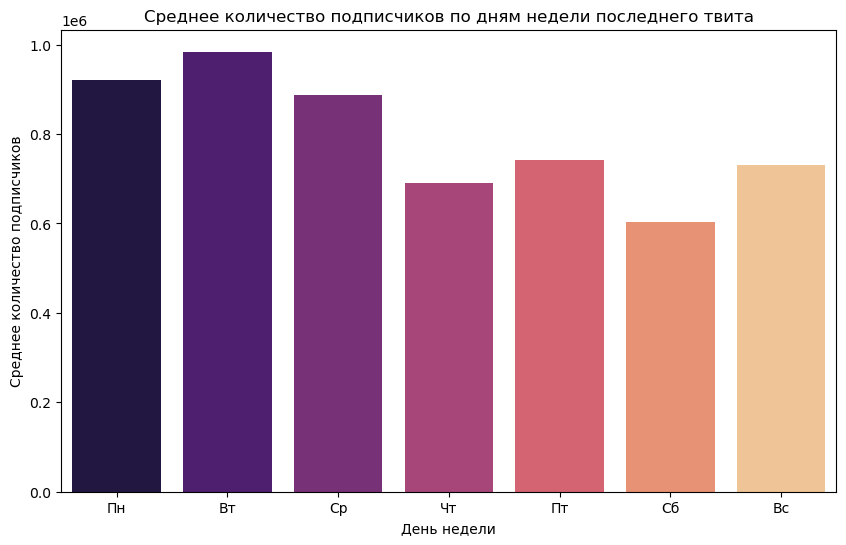

In [60]:
# Группировка по дню недели последнего твита и вычисление среднего количества подписчиков
followers_by_dayofweek = df.groupby('Last tweet.day-of-week')['Followers count'].mean()

plt.figure(figsize=(10, 6))
sns.barplot(x=followers_by_dayofweek.index, y=followers_by_dayofweek.values, palette='magma')
plt.title('Среднее количество подписчиков по дням недели последнего твита')
plt.xlabel('День недели')
plt.ylabel('Среднее количество подписчиков')
plt.xticks(range(7), ['Пн', 'Вт', 'Ср', 'Чт', 'Пт', 'Сб', 'Вс'])
plt.show()


C:\Users\User\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\User\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


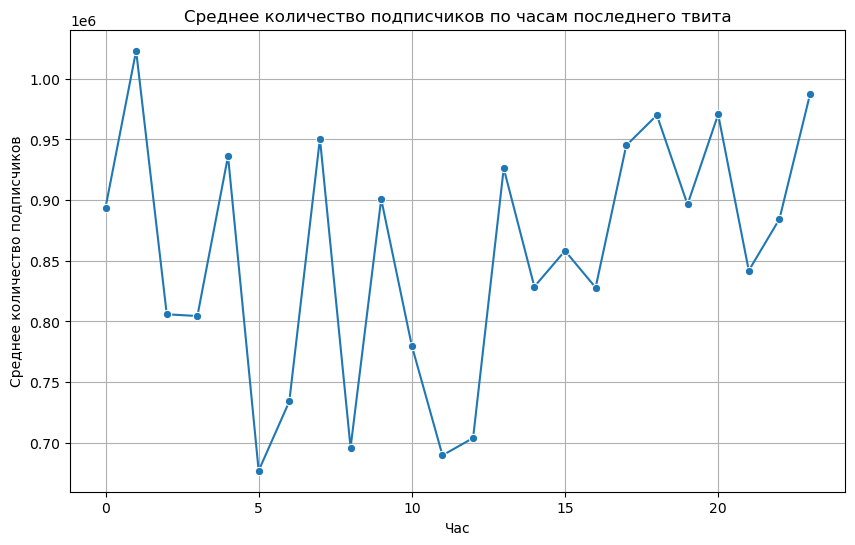

In [61]:
# Группировка по часу последнего твита и вычисление среднего количества подписчиков
followers_by_hour = df.groupby('Last tweet.hour')['Followers count'].mean()

plt.figure(figsize=(10, 6))
sns.lineplot(x=followers_by_hour.index, y=followers_by_hour.values, marker='o')
plt.title('Среднее количество подписчиков по часам последнего твита')
plt.xlabel('Час')
plt.ylabel('Среднее количество подписчиков')
plt.grid(True)
plt.show()
